# Script to plot Argos tags

This script is to plot up Argos pings from the PICOLLO project in Jan/Feb of 2024. This script takes two data inputs (both argos tags). On the project this was to compare a test tag on the RRS SDA to a glider, to see if we could determine if the glider was still gliding or not

### Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

Load in our 2 csv files (one for the glider and one for the ship). 

> NOTE: WHEN DOWNLOADING THE ARGOS PINGS DO NOT INCLUDE PING QUALITIES G,A or B THIS SCRIPT WON'T WORK

In [4]:
# SG565(tag: 238565)
glider = 565
infile = pd.read_csv('ArgosData_2024_06_28_11_05_29.csv', sep=';', parse_dates= True)

In [6]:
# SG565(tag: 238565)
glider = 565
infile_ship = pd.read_csv('ShipArgosData_2024_06_28_11_06_26.csv', sep=';', parse_dates= True)

### Glider tag
Convert the dataframe to a temporary numpy array, this way we can pull out the variables that we need for plotting/analysis

In [9]:
#Create a temporary array that we can pull out of
tmp = infile.to_numpy()

Pull out the relevant data from the dataframe and putting them into nparrays

In [12]:
# tag number
tag_no = tmp[0,0]

# time of message
time_msg = np.flip(tmp[:,2])

# time of location
time_loc_tmp = np.flip(tmp[:,3])

# convert time into datetime
time_loc_ts = []
time_loc = []
for x in range(len(time_loc_tmp)):
    # convert dates into a timestamp so they can be filtered by logic
    tloc_ts = dt.datetime.fromisoformat(time_loc_tmp[x])
    tloc_ts = dt.datetime.timestamp(tloc_ts)
    time_loc_ts.append(tloc_ts)
    # keep a record of the iso formats for plotting 
    tloc = np.datetime64(time_loc_tmp[x])
    time_loc.append(tloc)

# remove the temporary files from the loop
del([time_loc_tmp, tloc])

# longitude
lon = np.flip(tmp[:,4])

# latitude
lat = np.flip(tmp[:,5])

# location quality
loc_qual = np.flip(tmp[:,6])

Get rid of the temporary file so we can repeat with the ship data

In [15]:
# remove the temporary array so we can repeat with the ship data
del(tmp)

### Ships tag
We now repeat the above with the ship's tag, however we are now only interested in the time when a location was called. What we are trying to do is compare what a fixed variable on the surface looks like compared to a more intermittent diving glider tag looks like

In [18]:
#Create a temporary array that we can pull out of
tmp = infile_ship.to_numpy()

Now pull out the relevant data from the ship file

In [21]:
# tag number
tag_no_ship = tmp[0,0]

# time of message
time_msg_ship = np.flip(tmp[:,2])

# time of location
time_loc_ship_tmp = np.flip(tmp[:,3])

# convert time into datetime
time_loc_ship =[]
time_loc_ship_ts = []
for x in range(len(time_loc_ship_tmp)):
    # convert dates into a timestamp so they can be filtered by logic
    tloc_ts = dt.datetime.fromisoformat(time_loc_ship_tmp[x])
    tloc_ts = dt.datetime.timestamp(tloc_ts)
    time_loc_ship_ts.append(tloc_ts)
    # keep a record of the iso formats for plotting 
    tloc = np.datetime64(time_loc_ship_tmp[x])
    time_loc_ship.append(tloc)

del([time_loc_ship_tmp, tloc, tloc_ts])

# location quality
loc_qual_ship = np.flip(tmp[:,6])

Get rid of the temporary ship file

In [24]:
# remove the temporary array with the ship data
del(tmp)

To plot up part of the data we require an array of the same length as the date data with a constant value

In [27]:
# fill an array with values of 0.33
rd13 = np.zeros(len(time_loc_ship))
rd13[:] = (0.4)

# fill an array with values of 0.66
rd23 = np.zeros(len(time_loc))
rd23[:] = (0.6)

### Argos Ping quality
Not all argos pings are of the same quality, here we create arrays that are when we have good or poor quality pings

In [30]:
# Find the high and low quality fixes 
# define a critical value
crit = 2 # 0 (only the best fixes) to 3 (include okay fixes)

hi = loc_qual[loc_qual <= crit]

## Plotting

### Initial plotting
The first set of plots we want to do will cover the whole mission duration, however this is less useful due to how zoomed out the values are, so we will then create a second wave of plots to better investigate the timings

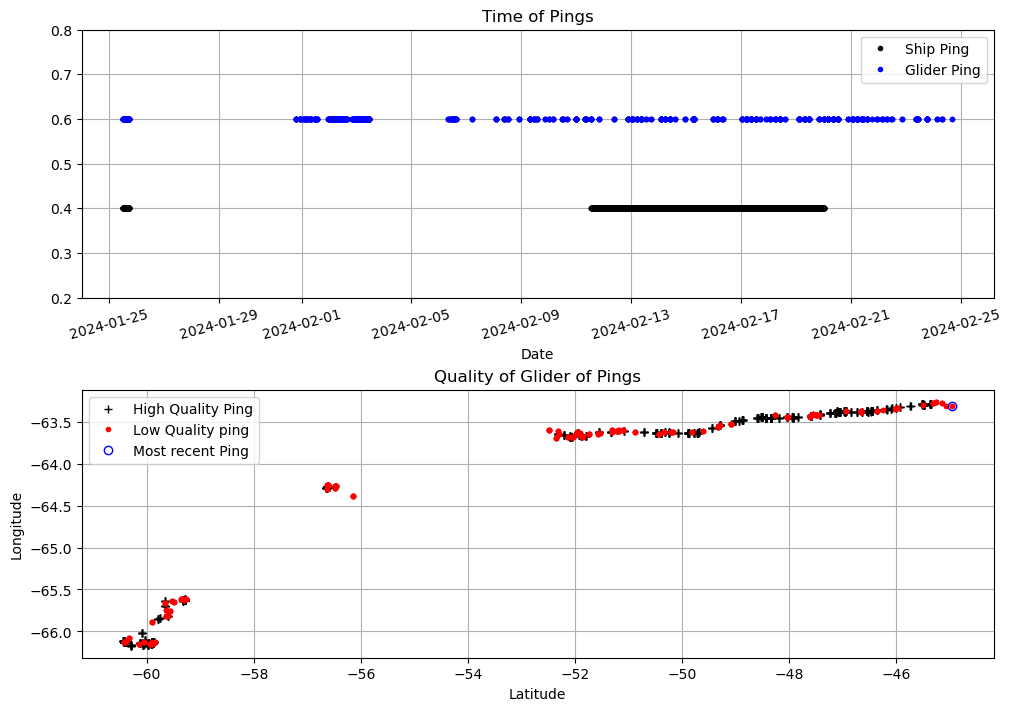

In [173]:
fig, ax = plt.subplots(2, 1, layout='constrained', figsize=(10, 7))

Line1 = ax[0].plot(time_loc_ship,rd13,'k.', label="Ship Ping")
Line2 = ax[0].plot(time_loc,rd23,'b.', label="Glider Ping")
ax[0].tick_params(axis='x', labelrotation=15, color='k', labelcolor='k')
ax[0].grid(visible=True)
ax[0].set_ylim([0.2,0.8])
ax[0].set_xlabel("Date")
ax[0].set_title("Time of Pings")
ax[0].legend()
#ax[0].set_xlim([np.datetime64("2024-02-13"), np.datetime64("2024-02-15")])

ax[1].plot(lon[loc_qual >= crit],lat[loc_qual >= crit],'k+',label="High Quality Ping")
ax[1].plot(lon[loc_qual < crit],lat[loc_qual < crit],'r.',label="Low Quality ping")
ax[1].plot(lon[-1],lat[-1],'bo',fillstyle= 'none',label="Most recent Ping")
ax[1].set_xlabel("Latitude")
ax[1].set_ylabel("Longitude")
ax[1].set_title("Quality of Glider of Pings")
ax[1].grid(visible=True)
ax[1].legend()

plt.savefig('All Ping Locations.png')
#ax[1].set_ylim([-63,-64])

### Plot glider quality pings with ship quality pings

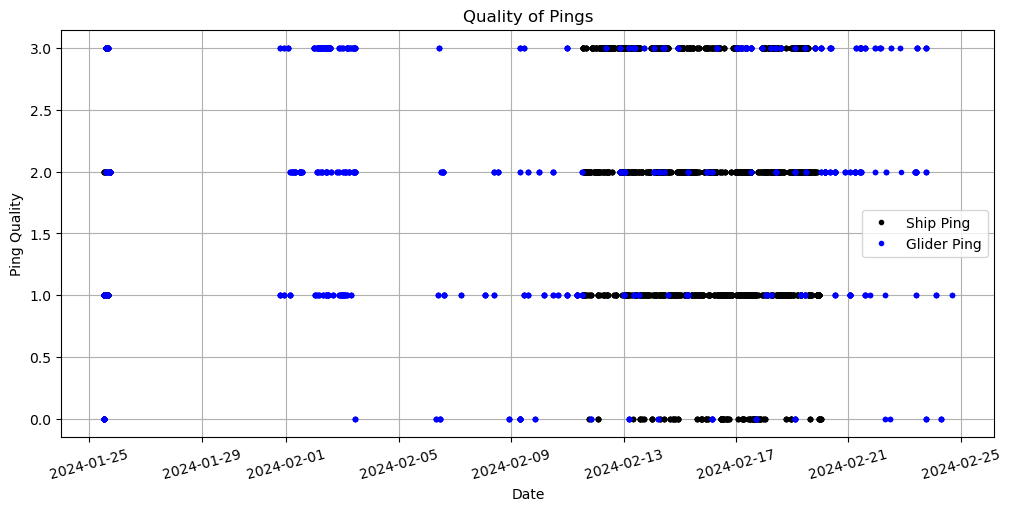

In [175]:
fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(10, 5))

Line1 = ax.plot(time_loc_ship,loc_qual_ship,'k.', label="Ship Ping")
Line2 = ax.plot(time_loc,loc_qual,'b.', label="Glider Ping")
ax.tick_params(axis='x', labelrotation=15, color='k', labelcolor='k')
ax.grid(visible=True)
ax.set_xlabel("Date")
ax.set_ylabel("Ping Quality")
ax.set_title("Quality of Pings")
ax.legend()

plt.savefig('Quality of Pings.png')


#ax.set_xlim([np.datetime64("2024-02-13"), np.datetime64("2024-02-15")])

Quality of pings is as follows:
 - 3 = 
 - 2 = 
 - 1 = 
 - 0 = 

### Plotting the time of interest
We are more interested in the time frame around when we had the argos tag on the SDA, and then once we have compared the two we want to have a look at the end of the mission to see if we can determine if the glider is still diving or is it drifting on the surface

First we need to determine what date range we are interested in. The format for the dates needs to be:
YYYY-MM-DD HH:MM:SS (HH:MM:SS is optional and the date will process without it as an input 

In [42]:
# Define out dates
start_date = "2024-02-13"
end_date = "2024-02-25"

# Convert to unix timestamps
st_date = dt.datetime.timestamp(dt.datetime.fromisoformat(start_date))
ed_date = dt.datetime.timestamp(dt.datetime.fromisoformat(end_date))

Then the quality of the pings (for both the glider and the ship), as well as the glider ping locations are filtered between the times we are interested in 

In [45]:
# Convert the array we will be applying the logic to, to an numpy array so that we can apply logic to it
tl_for_filt = np.array(time_loc_ts) # glider
tls_for_filt = np.array(time_loc_ship_ts) # ship

In [47]:
# time location glider
tlg_filt = np.array(time_loc)[(tl_for_filt >= st_date) & (tl_for_filt <= ed_date)]

# longitude of glider
lon_filt = np.array(lon)[(tl_for_filt >= st_date) & (tl_for_filt <= ed_date)]

# latitude of glider
lat_filt = np.array(lat)[(tl_for_filt >= st_date) & (tl_for_filt <= ed_date)]

# quality of glider ping
lqg_filt = (loc_qual)[(tl_for_filt >= st_date) & (tl_for_filt <= ed_date)]

In [49]:
# time location of ship
tls_filt = np.array(time_loc_ship)[(tls_for_filt >= st_date) & (tls_for_filt <= ed_date)]

# quality of ship pings
tqs_filt = np.array(loc_qual_ship)[(tls_for_filt >= st_date) & (tls_for_filt <= ed_date)]

Create array to plot against

In [52]:
# fill an array with values of 0.33
rd13_filt = np.zeros(len(tls_filt))
rd13_filt[:] = (0.4)

# fill an array with values of 0.66
rd23_filt = np.zeros(len(tlg_filt))
rd23_filt[:] = (0.6)

Plot up the subset of data

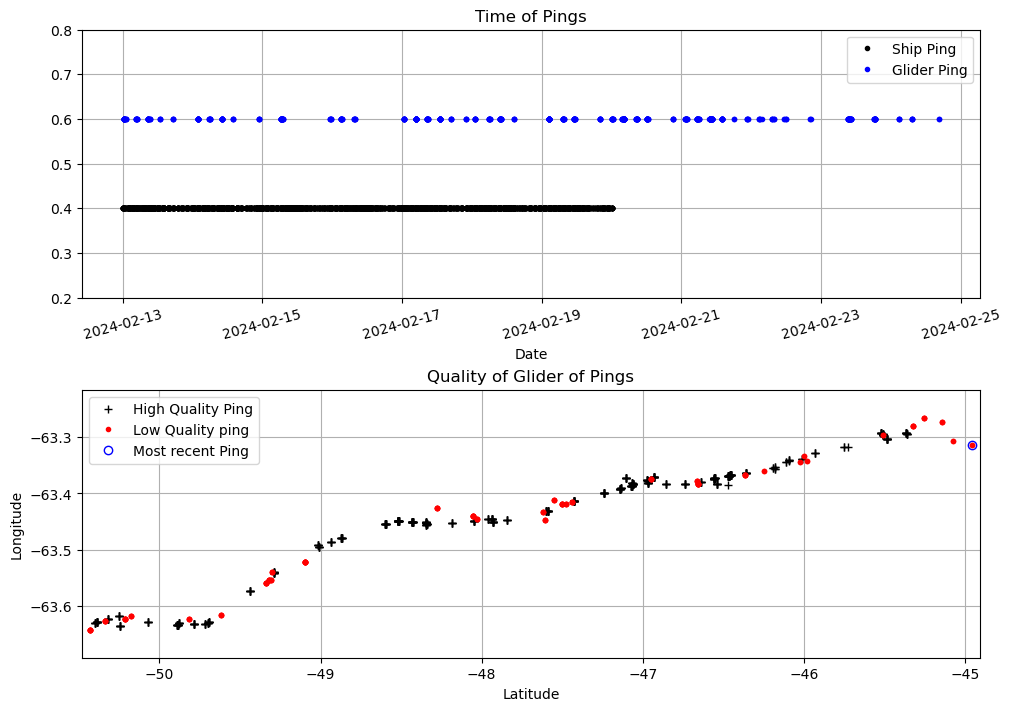

In [171]:
fig, ax = plt.subplots(2, 1, layout='constrained', figsize=(10, 7))

Line1 = ax[0].plot(tls_filt,rd13_filt,'k.', label="Ship Ping")
Line2 = ax[0].plot(tlg_filt,rd23_filt,'b.', label="Glider Ping")
ax[0].tick_params(axis='x', labelrotation=15, color='k', labelcolor='k')
ax[0].grid(visible=True)
ax[0].set_ylim([0.2,0.8])
ax[0].set_xlabel("Date")
ax[0].set_title("Time of Pings")
ax[0].legend()
#ax[0].set_xlim([np.datetime64("2024-02-13"), np.datetime64("2024-02-15")])

ax[1].plot(lon_filt[lqg_filt >= crit],lat_filt[lqg_filt >= crit],'k+',label="High Quality Ping")
ax[1].plot(lon_filt[lqg_filt < crit],lat_filt[lqg_filt < crit],'r.',label="Low Quality ping")
ax[1].plot(lon_filt[-1],lat_filt[-1],'bo',fillstyle= 'none',label="Most recent Ping")
ax[1].set_xlabel("Latitude")
ax[1].set_ylabel("Longitude")
ax[1].set_title("Quality of Glider of Pings")
ax[1].grid(visible=True)
ax[1].legend()
ax[1].set_xlim([min(lon_filt)-0.05,max(lon_filt)+0.05])
ax[1].set_ylim([min(lat_filt)-0.05,max(lat_filt)+0.05])

#Save file
plt.savefig('Pings between ' + start_date + ' and ' + end_date + '.png')

### Look at the different in timings between pings

We want to determine if the glider is sat for a long time at the surface, or if it is diving. By plotting up the time difference between pings we can get a good visual idea of what the glider is doing. 

In [142]:
#Glider ping time differences
dt_g = np.zeros(len(tlg_filt))
dt_g[0] = 0
dt_g[1:] = np.diff(tlg_filt)/60

# ship ping time differnces
dt_s = np.zeros(len(tls_filt))
dt_s[0] = 0
dt_s[1:] = np.diff(tls_filt)/60

Plot up the time difference against time

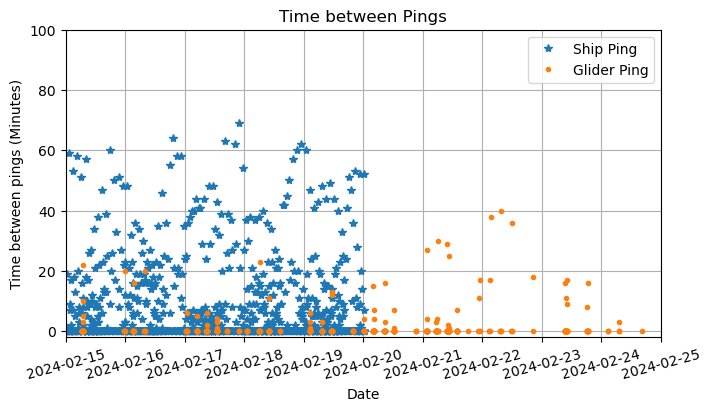

In [169]:
fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(7, 4))
ax.plot(tls_filt,dt_s,'*',label="Ship Ping")
ax.plot(tlg_filt,dt_g,'.',label="Glider Ping")
ax.grid(visible=True)
ax.set_xlabel("Date")
ax.set_ylabel("Time between pings (Minutes)")
ax.set_title("Time between Pings")
ax.legend()
ax.tick_params(axis='x', labelrotation=15, color='k', labelcolor='k')

# Use these limits to look closer at a specifc area (especially if your initial filtered area was too large
x_lower_lim = np.datetime64("2024-02-15")
x_upper_lim = np.datetime64("2024-02-25")
ax.set_ylim([-2,100])
ax.set_xlim([x_lower_lim,x_upper_lim])

#Save file
plt.savefig('Time between Pings ' + str(x_lower_lim) + ' and ' + str(x_upper_lim) + '.png')